In [1]:
'''
@authors: Jaren Haber, PhD, Dartmouth College; Nancy Xu, UC Berkeley
@PI: Prof. Heather Haveman, UC Berkeley
@date_modified: February 2023
@contact: jhaber@berkeley.edu
@inputs: file with counts of each perspective per year 
@outputs: ten line plots: One for all perspectives in Sociology by mean/median (two plots), one for all perspectives in Management by mean/median (two plots), one for each perspective in Sociology (by 25th/50th/75th percentile; three plots), and one for each perspective in Management (by 25th/50th/75th percentile; three plots).
@usage: run `python3 viz_trend_by_year.py` from within `embeddings/validate`
@description: Visualizes the ratio trend over the years for Sociology and Management/OB. 
'''

'\n@authors: Jaren Haber, PhD, Dartmouth College; Nancy Xu, UC Berkeley\n@PI: Prof. Heather Haveman, UC Berkeley\n@date_modified: February 2023\n@contact: jhaber@berkeley.edu\n@inputs: file with counts of each perspective per year \n@outputs: seven plots: One for all perspectives in Sociology by mean/median (two plots), one for all perspectives in Management by mean/median (two plots), one for each perspective in Sociology (by 25th/50th/75th percentile; three plots), and one for each perspective in Management (by 25th/50th/75th percentile; three plots).\n@usage: run `python3 viz_trend_by_year.py` from within `embeddings/validate`\n@description: Visualizes the ratio trend over the years for Sociology and Management/OB. \n'

In [2]:
###############################################
#                  Initialize                 #
###############################################

# Import packages
import pandas as pd
import numpy as np
from os.path import join
from os import getcwd
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.gcf() # For saving better figures

# Define filepaths
cwd = getcwd()
root = str.replace(cwd, 'embeddings/validate', '')
FIGURES_HOME = join(root, 'embeddings/figures/engagement_plots')
DATA_HOME = join(root, 'dictionary_methods/article_data')
COUNTS = join(DATA_HOME, 'dicts_count_ALL_merged_021423.csv')

<Figure size 432x288 with 0 Axes>

In [3]:
###############################################
#            Import & prepare data            #
###############################################

df = pd.read_csv(COUNTS, low_memory=False)
df['publicationYear'] = df['publicationYear'].astype(int)

# Standardize ratio cols
df['cultural_ratio'] = (df['cultural_ratio'] - df['cultural_ratio'].min())/(df['cultural_ratio'].max() - df['cultural_ratio'].min())
df['demographic_ratio'] = (df['demographic_ratio'] - df['demographic_ratio'].min())/(df['demographic_ratio'].max() - df['demographic_ratio'].min())
df['relational_ratio'] = (df['relational_ratio'] - df['relational_ratio'].min())/(df['relational_ratio'].max() - df['relational_ratio'].min())

# Get averages by year, splitting by discipline
keepcols = ['cultural_ratio', 'demographic_ratio', 'relational_ratio', 'publicationYear']
# Mean
df_avg_sociology = df[df['primary_subject'] == 'Sociology'][keepcols].groupby(by='publicationYear').mean().reset_index()
df_avg_management = df[df['primary_subject'] == 'Management & Organizational Behavior'][keepcols].groupby(by='publicationYear').mean().reset_index()

# 25th percentile
df_25_sociology = df[df['primary_subject'] == 'Sociology'][keepcols].groupby(by='publicationYear').quantile(0.25).reset_index()
df_25_management = df[df['primary_subject'] == 'Management & Organizational Behavior'][keepcols].groupby(by='publicationYear').quantile(0.25).reset_index()
df_25_sociology['percentile'] = '25th'
df_25_management['percentile'] = '25th'
# Median
df_50_sociology = df[df['primary_subject'] == 'Sociology'][keepcols].groupby(by='publicationYear').quantile(0.5).reset_index()
df_50_management = df[df['primary_subject'] == 'Management & Organizational Behavior'][keepcols].groupby(by='publicationYear').quantile(0.5).reset_index()
df_50_sociology['percentile'] = '50th'
df_50_management['percentile'] = '50th'
# 75th percentile
df_75_sociology = df[df['primary_subject'] == 'Sociology'][keepcols].groupby(by='publicationYear').quantile(0.75).reset_index()
df_75_management = df[df['primary_subject'] == 'Management & Organizational Behavior'][keepcols].groupby(by='publicationYear').quantile(0.75).reset_index()
df_75_sociology['percentile'] = '75th'
df_75_management['percentile'] = '75th'
# Join percentiles into one df per discipline
df_sociology = pd.concat([df_25_sociology, df_50_sociology, df_75_sociology]).reset_index()
df_management = pd.concat([df_25_management, df_50_management, df_75_management]).reset_index()

In [4]:
# Make long-format DFs for each discipline (for plotting purposes), using mean and median

# mean: soc
df_avg_long_soc = pd.melt(df_avg_sociology, id_vars=['publicationYear'])
df_avg_long_soc.columns = ['Year', 'Perspective', 'Engagement']
persp_conditions = [df_avg_long_soc.Perspective == 'cultural_ratio', df_avg_long_soc.Perspective == 'demographic_ratio', df_avg_long_soc.Perspective == 'relational_ratio']
persp_values = ['Organizational Institutionalism', 'Organizational Ecology', 'Resource Dependence']
df_avg_long_soc['Perspective'] = np.select(persp_conditions, persp_values)

# mean: mgmt
df_avg_long_mgmt = pd.melt(df_avg_management, id_vars=['publicationYear'])
df_avg_long_mgmt.columns = ['Year', 'Perspective', 'Engagement']
persp_conditions = [df_avg_long_mgmt.Perspective == 'cultural_ratio', df_avg_long_mgmt.Perspective == 'demographic_ratio', df_avg_long_mgmt.Perspective == 'relational_ratio']
df_avg_long_mgmt['Perspective'] = np.select(persp_conditions, persp_values)

# median: soc
df_50_long_soc = pd.melt(df_50_sociology.drop(columns=['percentile']), id_vars=['publicationYear'])
df_50_long_soc.columns = ['Year', 'Perspective', 'Engagement']
persp_conditions = [df_50_long_soc.Perspective == 'cultural_ratio', df_50_long_soc.Perspective == 'demographic_ratio', df_50_long_soc.Perspective == 'relational_ratio']
df_50_long_soc['Perspective'] = np.select(persp_conditions, persp_values)

# median: mgmt
df_50_long_mgmt = pd.melt(df_50_management.drop(columns=['percentile']), id_vars=['publicationYear'])
df_50_long_mgmt.columns = ['Year', 'Perspective', 'Engagement']
persp_conditions = [df_50_long_mgmt.Perspective == 'cultural_ratio', df_50_long_mgmt.Perspective == 'demographic_ratio', df_50_long_mgmt.Perspective == 'relational_ratio']
df_50_long_mgmt['Perspective'] = np.select(persp_conditions, persp_values)

In [5]:
###############################################
#      Plot engagement: all perspectives      #
###############################################

# Color scheme:
# org ecol = green dashed line, res depce = blue dotted line, org instl = red solid line
custom_palette = ['red', 'green', 'blue']

Ratio Engagement w/ Cultural Perspective - Sociology


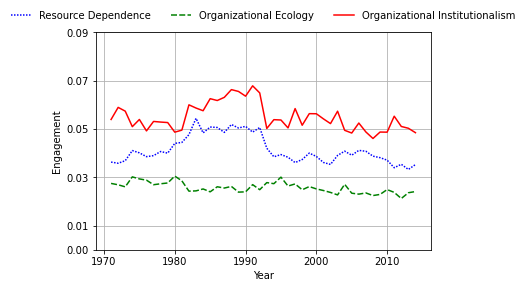

In [6]:
# All perspectives: Sociology (mean)
ax = sns.lineplot(x="Year", y="Engagement", data=df_avg_long_soc, 
                  hue='Perspective', style='Perspective', palette=custom_palette)

ax.set(xlabel='Year', ylabel='Engagement')
ax.set(ylim=(0.0, 0.09))
plt.yticks([0.0, 0.01, 0.03, 0.05, 0.07, 0.09])
ax.grid()
title = 'Ratio Engagement w/ Cultural Perspective - Sociology'
print(title)
#ax.set_title(title)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper center', bbox_to_anchor=(0.5, 1.14), ncol=3, frameon=False)

fig.set_size_inches(8, 6)
thisday = date.today().strftime("%m%d%y") # get current date
fname = f"ratio_all_sociology_mean_{thisday}"
plt.savefig(join(FIGURES_HOME, fname + ".png"), dpi=1200, bbox_inches="tight")
plt.show()

Ratio Engagement w/ Cultural Perspective - Sociology


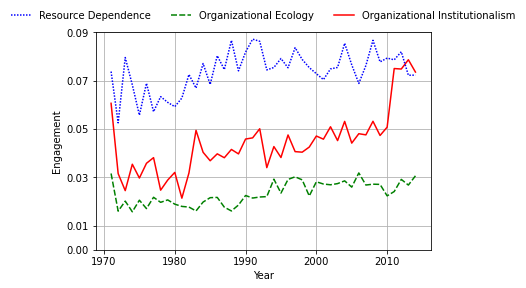

In [7]:
# All perspectives: Management (mean)
ax = sns.lineplot(x="Year", y="Engagement", data=df_avg_long_mgmt, 
                  hue='Perspective', style='Perspective', palette=custom_palette)
ax.set(xlabel='Year', ylabel='Engagement')
ax.set(ylim=(0.0, 0.09))
plt.yticks([0.0, 0.01, 0.03, 0.05, 0.07, 0.09])
ax.grid()
title = 'Ratio Engagement w/ Cultural Perspective - Sociology'
print(title)
#ax.set_title(title)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper center', bbox_to_anchor=(0.5, 1.14), ncol=3, frameon=False)

fig.set_size_inches(8, 6)
thisday = date.today().strftime("%m%d%y") # get current date
fname = f"ratio_all_management_mean_{thisday}"
plt.savefig(join(FIGURES_HOME, fname + ".png"), dpi=1200, bbox_inches="tight")
plt.show()

Ratio Engagement w/ Cultural Perspective - Sociology


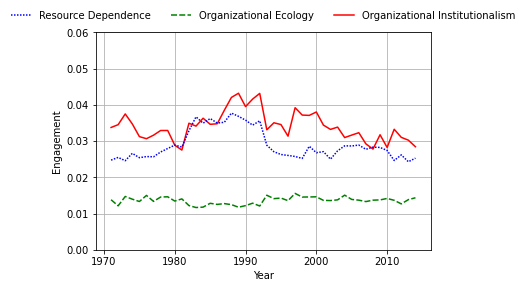

In [8]:
# All perspectives: Sociology (median)
ax = sns.lineplot(x="Year", y="Engagement", data=df_50_long_soc, 
                  hue='Perspective', style='Perspective', palette=custom_palette)
ax.set(xlabel='Year', ylabel='Engagement')
ax.set(ylim=(0.0, 0.06))
ax.grid()
title = 'Ratio Engagement w/ Cultural Perspective - Sociology'
print(title)
#ax.set_title(title)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper center', bbox_to_anchor=(0.5, 1.14), ncol=3, frameon=False)

fig.set_size_inches(8, 6)
thisday = date.today().strftime("%m%d%y") # get current date
fname = f"ratio_all_sociology_median_{thisday}"
plt.savefig(join(FIGURES_HOME, fname + ".png"), dpi=1200, bbox_inches="tight")
plt.show()

Ratio Engagement w/ Cultural Perspective - Sociology


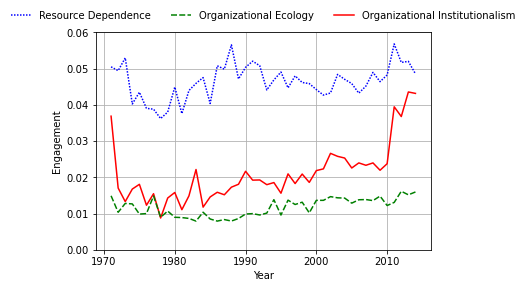

In [9]:
# All perspectives: Management (median)
ax = sns.lineplot(x="Year", y="Engagement", data=df_50_long_mgmt, 
                  hue='Perspective', style='Perspective', palette=custom_palette)
ax.set(xlabel='Year', ylabel='Engagement')
ax.set(ylim=(0.0, 0.06))
ax.grid()
title = 'Ratio Engagement w/ Cultural Perspective - Sociology'
print(title)
#ax.set_title(title)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper center', bbox_to_anchor=(0.5, 1.14), ncol=3, frameon=False)

fig.set_size_inches(8, 6)
thisday = date.today().strftime("%m%d%y") # get current date
fname = f"ratio_all_management_median_{thisday}"
plt.savefig(join(FIGURES_HOME, fname + ".png"), dpi=1200, bbox_inches="tight")
plt.show()

Ratio Engagement w/ Cultural Perspective - Sociology


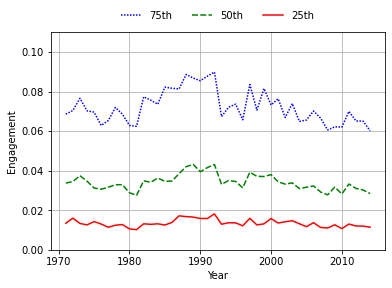

In [10]:
###############################################
#   Plot engagement: 25/50/75th percentiles   #
###############################################

# Cultural: Sociology
ax = sns.lineplot(x="publicationYear", y="cultural_ratio", data=df_sociology, 
                  hue='percentile', style='percentile', palette=custom_palette)
ax.set(xlabel='Year', ylabel='Engagement')
ax.set(ylim=(0.0, 0.11))
ax.grid()
title = 'Ratio Engagement w/ Cultural Perspective - Sociology'
print(title)
#ax.set_title(title)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper center', bbox_to_anchor=(0.5, 1.14), ncol=3, frameon=False)

fig.set_size_inches(8, 6)
thisday = date.today().strftime("%m%d%y") # get current date
fname = f"ratio_cultural_sociology_{thisday}"
plt.savefig(join(FIGURES_HOME, fname + ".png"), dpi=1200, bbox_inches="tight")
plt.show()

Ratio Engagement w/ Cultural Perspective - Management


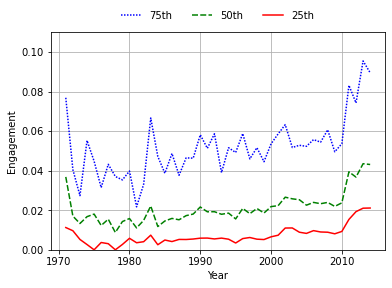

In [11]:
# Cultural: Management/OB
df_management = df_management[~df_management['publicationYear'].isin([1970,2016])]
ax = sns.lineplot(x="publicationYear", y="cultural_ratio", data=df_management, 
                  hue='percentile', style='percentile', palette=custom_palette)
ax.set(xlabel='Year', ylabel='Engagement')
ax.set(ylim=(0.0, 0.11))
ax.grid()
title = 'Ratio Engagement w/ Cultural Perspective - Management'
print(title)
#ax.set_title(title)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper center', bbox_to_anchor=(0.5, 1.14), ncol=3, frameon=False)

fig.set_size_inches(8, 6)
thisday = date.today().strftime("%m%d%y") # get current date
fname = f"ratio_cultural_management_{thisday}"
plt.savefig(join(FIGURES_HOME, fname + ".png"), dpi=1200, bbox_inches="tight")
plt.show()

Ratio Engagement w/ Demographic Perspective - Sociology


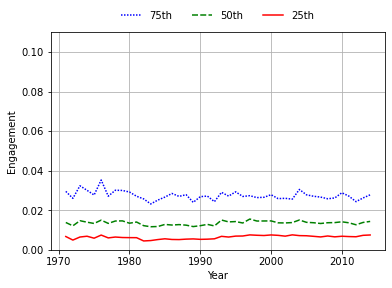

In [12]:
# Demographic: Sociology
ax = sns.lineplot(x="publicationYear", y="demographic_ratio", data=df_sociology, 
                  hue='percentile', style='percentile', palette=custom_palette)
ax.set(xlabel='Year', ylabel='Engagement')
ax.set(ylim=(0.0, 0.11))
ax.grid()
title = 'Ratio Engagement w/ Demographic Perspective - Sociology'
print(title)
#ax.set_title(title)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper center', bbox_to_anchor=(0.5, 1.14), ncol=3, frameon=False)

fig.set_size_inches(8, 6)
thisday = date.today().strftime("%m%d%y") # get current date
fname = f"ratio_demographic_sociology_{thisday}"
plt.savefig(join(FIGURES_HOME, fname + ".png"), dpi=200, bbox_inches="tight")
plt.show()

Ratio Engagement w/ Demographic Perspective - Management


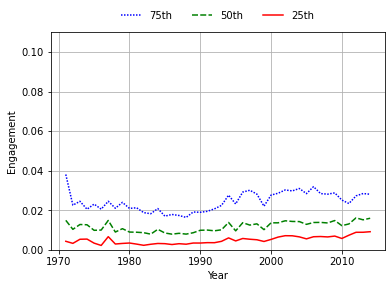

In [13]:
# Demographic: Management
ax = sns.lineplot(x="publicationYear", y="demographic_ratio", data=df_management, 
                  hue='percentile', style='percentile', palette=custom_palette)
ax.set(xlabel='Year', ylabel='Engagement')
ax.set(ylim=(0.0, 0.11))
ax.grid()
title = 'Ratio Engagement w/ Demographic Perspective - Management'
print(title)
#ax.set_title(title)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper center', bbox_to_anchor=(0.5, 1.14), ncol=3, frameon=False)

fig.set_size_inches(8, 6)
thisday = date.today().strftime("%m%d%y") # get current date
fname = f"ratio_demographic_management_{thisday}"
plt.savefig(join(FIGURES_HOME, fname + ".png"), dpi=200, bbox_inches="tight")
plt.show()

Ratio Engagement w/ Relational Perspective - Sociology


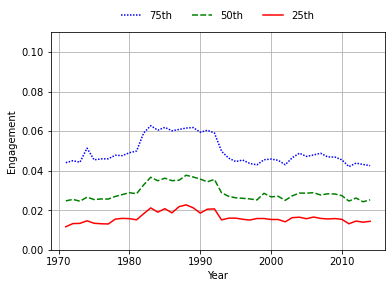

In [14]:
# Relational: Sociology
ax = sns.lineplot(x="publicationYear", y="relational_ratio", data=df_sociology, 
                  hue='percentile', style='percentile', palette=custom_palette)
ax.set(xlabel='Year', ylabel='Engagement')
ax.set(ylim=(0.0, 0.11))
ax.grid()
title = 'Ratio Engagement w/ Relational Perspective - Sociology'
print(title)
#ax.set_title(title)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper center', bbox_to_anchor=(0.5, 1.14), ncol=3, frameon=False)

fig.set_size_inches(8, 6)
thisday = date.today().strftime("%m%d%y") # get current date
fname = f"ratio_relational_sociology_{thisday}"
plt.savefig(join(FIGURES_HOME, fname + ".png"), dpi=200, bbox_inches="tight")
plt.show()

Ratio Engagement w/ Relational Perspective - Management


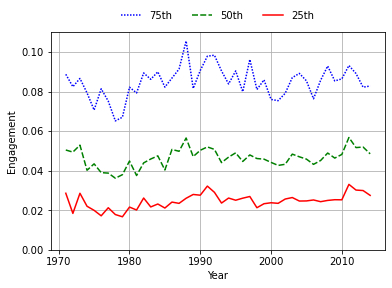

In [15]:
# Relational: Management
ax = sns.lineplot(x="publicationYear", y="relational_ratio", data=df_management, 
                  hue='percentile', style='percentile', palette=custom_palette)
ax.set(xlabel='Year', ylabel='Engagement')
ax.set(ylim=(0.0, 0.11))
ax.grid()
title = 'Ratio Engagement w/ Relational Perspective - Management'
print(title)
#ax.set_title(title)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper center', bbox_to_anchor=(0.5, 1.14), ncol=3, frameon=False)

fig.set_size_inches(8, 6)
thisday = date.today().strftime("%m%d%y") # get current date
fname = f"ratio_relational_management_{thisday}"
plt.savefig(join(FIGURES_HOME, fname + ".png"), dpi=200, bbox_inches="tight")
plt.show()